Covariance matrix between data:
 [[ 6.29444444e+01 -2.13090000e+04]
 [-2.13090000e+04  3.38090577e+08]]


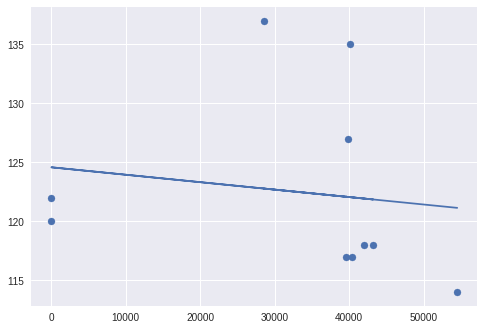

Expected salary based on tuition:
 Tuititon: 0     , Salary: 124.56928069219097
 Tuititon: 0     , Salary: 124.56928069219097
 Tuititon: 28540 , Salary: 122.77047616496618
 Tuititon: 39565 , Salary: 122.07559810215422
 Tuititon: 39900 , Salary: 122.05448389344294
 Tuititon: 40133 , Salary: 122.03979848857806
 Tuititon: 40400 , Salary: 122.02297014909772
 Tuititon: 42050 , Salary: 121.91897479275852
 Tuititon: 43220 , Salary: 121.84523263099071
 Tuititon: 54506 , Salary: 121.13390439363056



In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Raw data points
salary = [137, 135, 127, 122, 120, 118, 118, 117, 117, 114]
tuition = [28540, 40133, 39900, 0, 0, 42050, 43220, 39565, 40400, 54506]

# Plot data points on graph
plt.scatter(tuition, salary)

# Show covariance matrix
print("Covariance matrix between data:\n", np.cov(salary, tuition))

# Convert data to np arrays
salary = np.array([[data_point] for data_point in salary])
tuition = np.array([[data_point] for data_point in tuition])

# Linear regression model
def linreg(inputs, targets):
  transformed_inputs = np.concatenate((inputs, -np.ones((np.shape(inputs)[0],1))), axis=1)
  beta = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(transformed_inputs),transformed_inputs)),
                       np.transpose(transformed_inputs)),
                targets)
  outputs = np.dot(transformed_inputs, beta)
  return outputs

# Compute regression outputs
expected = linreg(tuition, salary)

# Plot the fit line
plt.plot(tuition, expected)
plt.show()

print("Expected salary based on tuition:\n",
      *("Tuititon: {0: <6}, Salary: {1}\n".format(tuit[0], sal[0])
       for (tuit, sal)
       in sorted(zip(tuition, expected))))

Based on the covariance matrix alone, it is clear to see that tuition and salary have a negative correlation -- according to the data, as the price of yearly tuition increases, predicted yearly salary decreases.

Based on the linear regression model that we are learning about, it is even clearer to see: there is a negative trend line that best fits the training data. For a higher yearly tuition for a student, it is expected by this model that they will earn less money per year in a salaried job mid-career after graduating. The costs of higher tuition do not seem to translate into higher-paying jobs with this dataset.